In [163]:
import numpy as np
import pandas as pd
from src.PATH import *
from src import utils
from src import my_metrics

In [160]:
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage,dendrogram,distance 

from sklearn.preprocessing import scale , normalize

In [4]:
from scipy.cluster.hierarchy import dendrogram

In [5]:
from matplotlib import pyplot as plt
from matplotlib import cm
from IPython.core.pylabtools import figsize
%matplotlib widget

In [6]:
pds = utils.read_leukocyte(data_path)
#pds = read_leukocyte(data_path,True)
v_data = pds.iloc[:,1:].values

## statistics

In [7]:
statistics = pds.describe(percentiles=[0.25,0.5,0.75,0.95])

In [8]:
data = statistics.values[1:,:]

In [9]:
from matplotlib.ticker import StrMethodFormatter
valfmt = StrMethodFormatter('{x:.3f}')

/home/ZwZ/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


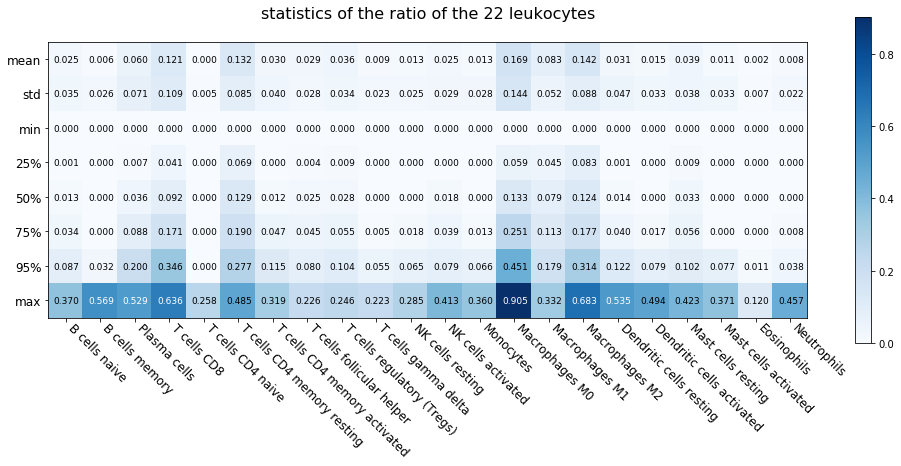

In [10]:
%matplotlib inline

data = statistics.values[1:,:]
fig,ax = plt.subplots(figsize=(17,10))

im = ax.imshow(data,cmap=cm.Blues);
cbar = ax.figure.colorbar(im,shrink=0.6);

ax.set_title('statistics of the ratio of the 22 leukocytes\n',size=16)
ax.xaxis.set_tick_params(pad=0,rotation=-45) 
ax.yaxis.set_ticks(range(0,8));
ax.set_yticklabels(statistics.index[1:],size=12)
ax.xaxis.set_ticks(range(0,22));
ax.set_xticklabels(statistics.columns,ha='left',size=12);

for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        font_color = ['black','w'][(data[i,j] > 0.5)]
        ax.text(j-0.35,i+0.08,valfmt(data[i,j],None),color=font_color,size=9)

In [19]:
v_data = np.array(pds.values[:,1:],dtype=np.float32)
v_data = v_data - np.mean(v_data,axis=0)

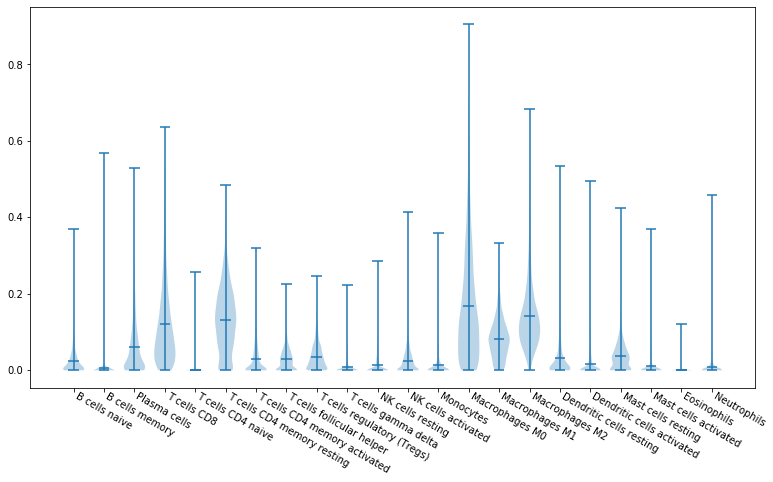

In [16]:
%matplotlib inline
fig,ax = plt.subplots(figsize=(13,7))
violin = ax.violinplot(v_data,showmeans=True,widths=0.7,showextrema=True,)

ax.xaxis.set_tick_params(pad=0,rotation=-30) 
ax.xaxis.set_ticks(range(1,23));
ax.set_xticklabels(statistics.columns,ha='left',size=10);

## data filtering

In [20]:
columns = list(pds.columns)

In [21]:
from matplotlib_venn import venn3

### 'B cells memory', 'T cells CD4 naive', 'Eosinophils'

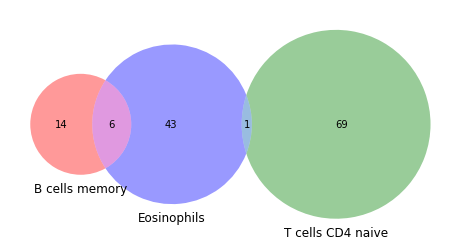

In [57]:
plt.figure(figsize=(8,6));

# element inside is set 
subsets=np.array([set(np.where(pds[columns[5]] != 0)[0]),
                  set(np.where(pds[columns[-2]] > 0.02)[0]),
                  set(np.where(pds[columns[2]] > 0.1)[0])])
# venn3 not venn2
venn3(subsets=subsets,set_labels=(columns[2],columns[5],columns[-2]));

## try all leukocyte 
find out sample that are outside 95% 

In [22]:
threshold = statistics.loc['95%'].values
gtr_sum = np.sum(v_data > threshold,axis=1)

In [109]:
%matplotlib widget

plt.bar(range(v_data.shape[0]),gtr_sum);
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [95]:
np.bincount(gtr_sum)

array([ 961, 1303,  653,  201,   29,    2])

<font size=6 color='darkred'><center> **will drop data where ```gtr_sum```<4**    </font>

In [25]:
v_data.shape

(3149, 22)

In [27]:
v_data = v_data[gtr_sum <4]

from sklearn.preprocessing import normalize
n_data = normalize(v_data,axis=0)

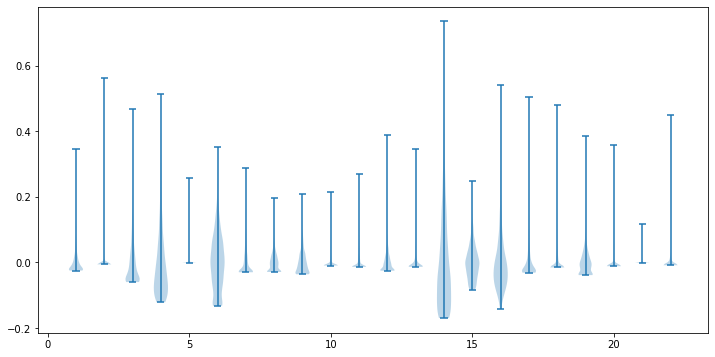

In [28]:
plt.figure(figsize=(12,6))
plt.violinplot(v_data);

# decomposition

## TSNE

drop out group data

In [85]:
from tqdm import tqdm

In [86]:
tsne_datas = [TSNE(perplexity=perplexity,n_jobs=8,n_iter=8000).fit_transform(v_data) 
              for perplexity in tqdm([5,10,15,20,25,30,35,40,45])]

100%|██████████| 9/9 [12:54<00:00, 86.10s/it] 


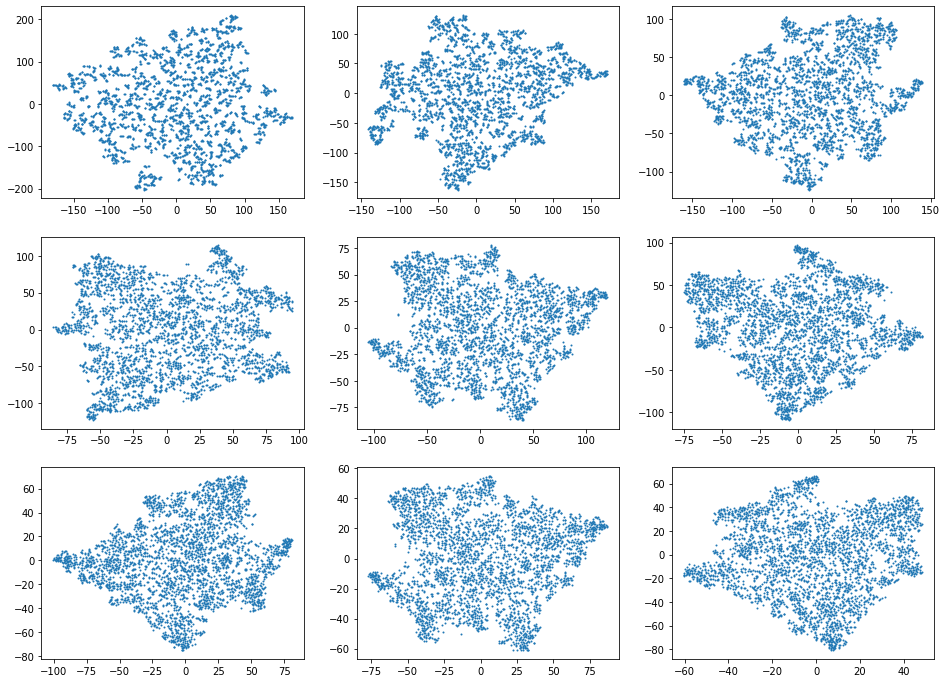

In [289]:
fig = plt.figure(figsize=(16,12))
ax = fig.subplots(3,3)
i = 0
for k in range(3):
    for j in range(3):
        ax[k,j].scatter(tsne_datas[i][:,0],tsne_datas[i][:,1],s=1)
        i += 1

and further normalize

In [290]:
tsne_datas_n = [TSNE(perplexity=perplexity,n_jobs=8,n_iter=8000).fit_transform(n_data) 
              for perplexity in [5,10,15,20,25,30,35,40,45]]

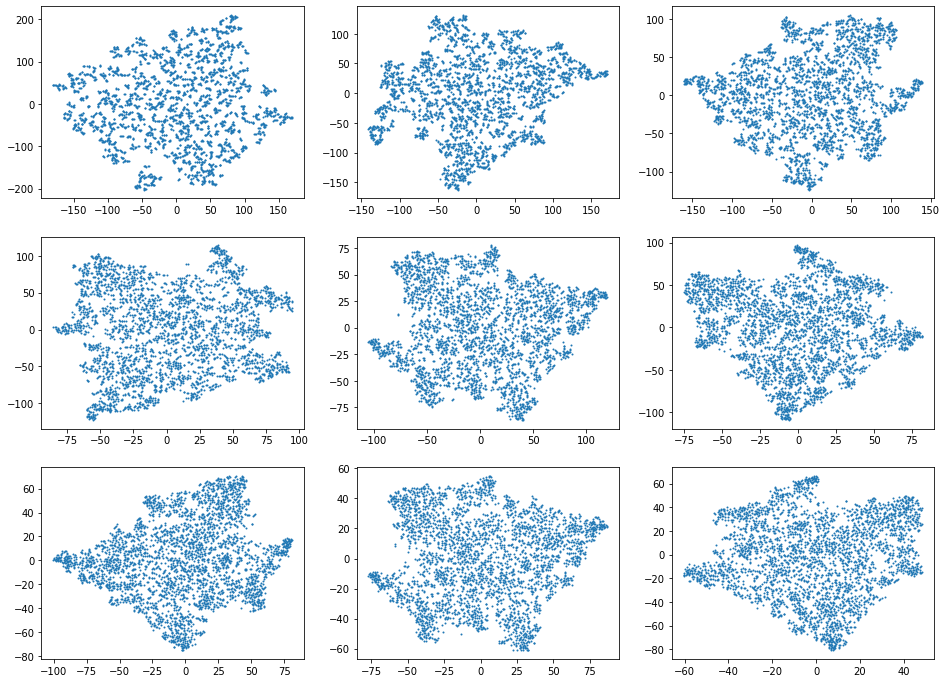

In [291]:
fig = plt.figure(figsize=(16,12))
ax = fig.subplots(3,3)
i = 0
for k in range(3):
    for j in range(3):
        ax[k,j].scatter(tsne_datas[i][:,0],tsne_datas[i][:,1],s=1)
        i += 1

## PCA

In [161]:
from sklearn.decomposition import PCA,KernelPCA

In [164]:
pca_data = PCA(n_components=2).fit_transform(n_data)
rbfpca = KernelPCA(n_components=2,kernel='rbf').fit_transform(n_data)
sigpca = KernelPCA(n_components=2,kernel='sigmoid').fit_transform(n_data)
polypca = KernelPCA(n_components=2,kernel='poly').fit_transform(n_data)

In [165]:
fig,ax = plt.subplots(2,2,figsize=(16,16))
ax[0,0].scatter(pca_data[:,0],pca_data[:,1],s=4);
ax[0,1].scatter(rbfpca[:,0],rbfpca[:,1],s=4);
ax[1,0].scatter(sigpca[:,0],sigpca[:,1],s=4);
ax[1,1].scatter(polypca[:,0],polypca[:,1],s=4);

/home/ZwZ/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# clustering

## Hierarchical Clustering

In [1]:
disMat=distance.pdist(n_data,metric='mahalanobis')
Z=linkage(disMat,method='centroid') 

tree = dendrogram(Z,p=5,truncate_mode='level',no_labels=True)

NameError: name 'distance' is not defined

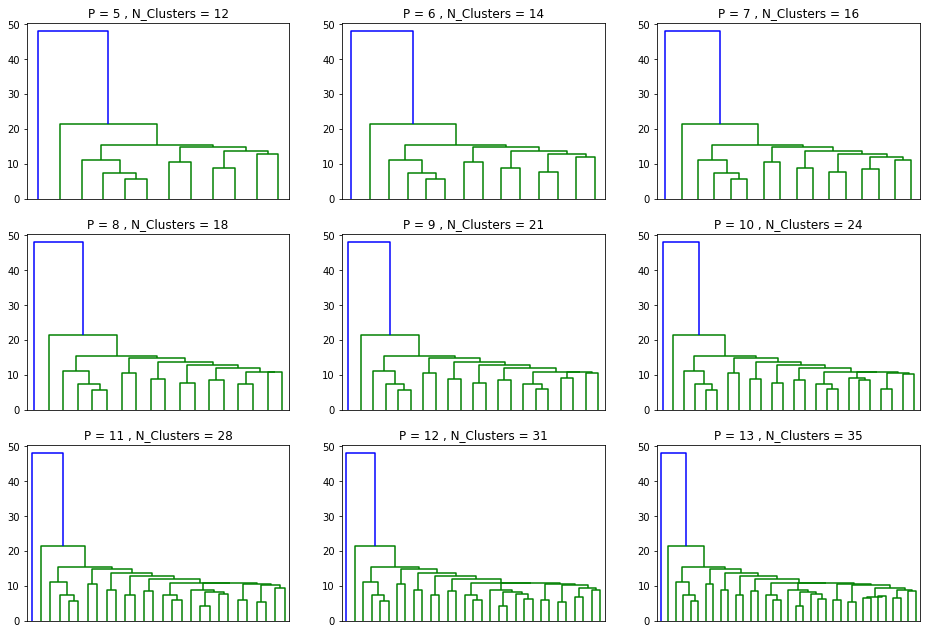

In [79]:
p = 5
fig = plt.figure(figsize=(16,11))
axs = fig.subplots(3,3)
for i in range(3):
    for j in range(3):
        ax = axs[i,j]
        tree = dendrogram(Z,p=p,truncate_mode='level',no_labels=True,distance_sort=True,ax=ax)
        ax.set_title('P = {} , N_Clusters = {}'.format(p, len(tree['leaves'])))
        p += 1

In [80]:
len(tree['ivl']),len(tree['leaves'])

(35, 35)

In [226]:
t_axises =tsne_datas[2]

##  AgglomerativeClustering

'braycurtis', 'canberra', 'chebyshev', 'cityblock','correlation', 'cosine', 'dice', 'euclidean', 'hamming',
    'jaccard', 'jensenshannon', 'kulsinski', 'mahalanobis', 'matching',
    'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean',
    'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule'

In [11]:
from src import my_metrics

In [15]:
n_data = pds.iloc[:,1:].values

In [18]:
ac_label_ls = [AgglomerativeClustering(n_clusters=i).fit_predict(n_data) for i in range(5,20)]

ac_metrics = my_metrics.cluster_metrics(n_data,ac_label_ls)

In [431]:
save_labels2DF(ac_label_ls,'Hierarchical.csv')

## K-means

In [170]:
from sklearn.cluster import KMeans

In [325]:
km_label_ls=[KMeans(n_clusters=i,n_jobs=8).fit_predict(n_data) for i in range(5,20)]

In [338]:
km_metrics = my_metrics.cluster_metrics(n_data,km_label_ls)

In [432]:
save_labels2DF(km_label_ls,'K_means.csv')

## GMM

In [198]:
from sklearn.mixture import BayesianGaussianMixture as BGM

In [ ]:
GMM()

In [327]:
gmm_label_ls=[GMM(n_components=i,max_iter=400).fit_predict(n_data) for i in  range(5,20)]

In [339]:
gmm_metrics = my_metrics.cluster_metrics(n_data,gmm_label_ls)

In [433]:
save_labels2DF(gmm_label_ls,'GMM_label.csv')

## Mean Shift

In [372]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [399]:
estimate_bandwidth(v_data,quantile=0.3)

0.29741518205130424

In [ ]:
os.path.exis

<font size=3 color='darkred'> **bandiwidth** largely decide the number of clusters </font>

In [400]:
ms_label=MeanShift(bandwidth=0.2).fit_predict(v_data)

In [401]:
len(np.unique(ms_label))

22

## AP

In [374]:
from sklearn.cluster import AffinityPropagation

In [387]:
ap_label=AffinityPropagation(damping=0.5,preference=None).fit_predict(v_data)

In [388]:
len(np.unique(ap_label))

124

In [378]:
ap_label

array([14, 38,  8, ..., 39, 36, 68])

## plot

No handles with labels found to put in legend.


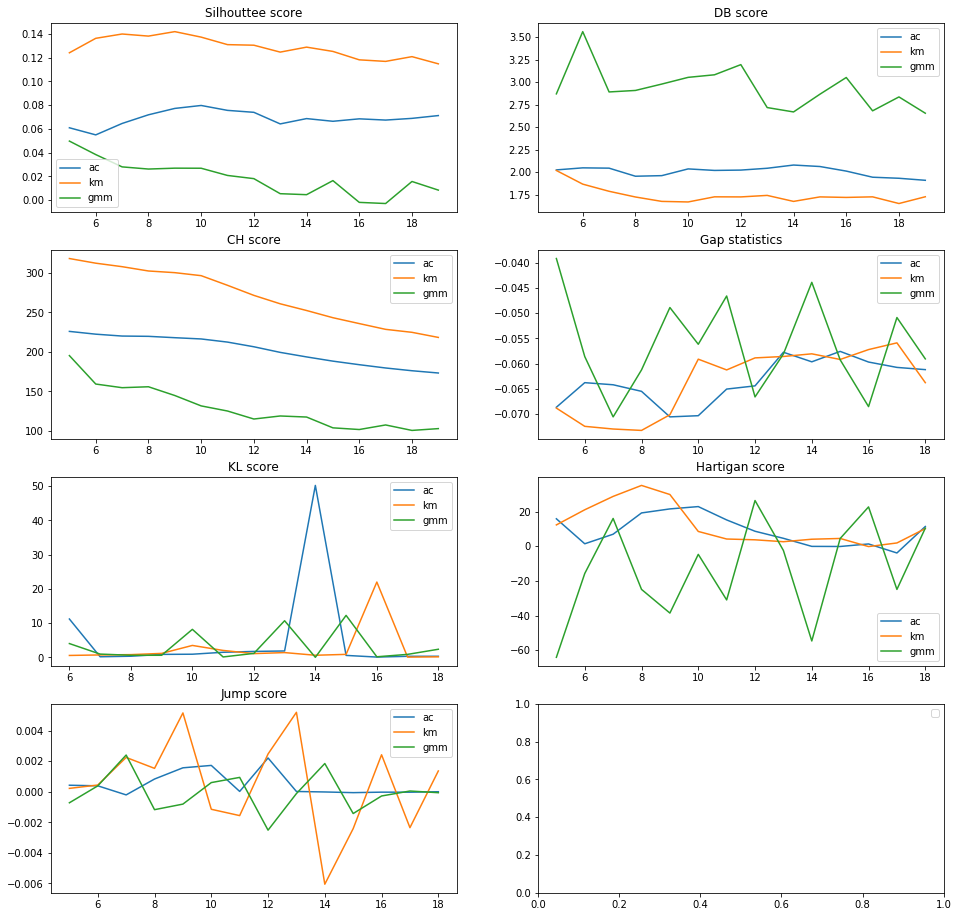

In [340]:
figall = plt.figure(figsize=(16,16))
ax = figall.subplots(4,2)
ac_metrics.all_in_one(fig=figall,ax=ax,**{'label':'ac'})
km_metrics.all_in_one(fig=figall,ax=ax,**{'label':'km'})
gmm_metrics.all_in_one(fig=figall,ax=ax,**{'label':'gmm'})
# ax[0,0].set_xticks(,['5','8','10','12','15','20'])
for ls in ax:
    for axx in ls:
        axx.legend()

In [330]:
from sklearn.metrics import calinski_harabasz_score

In [ ]:
calinski_harabasz_score

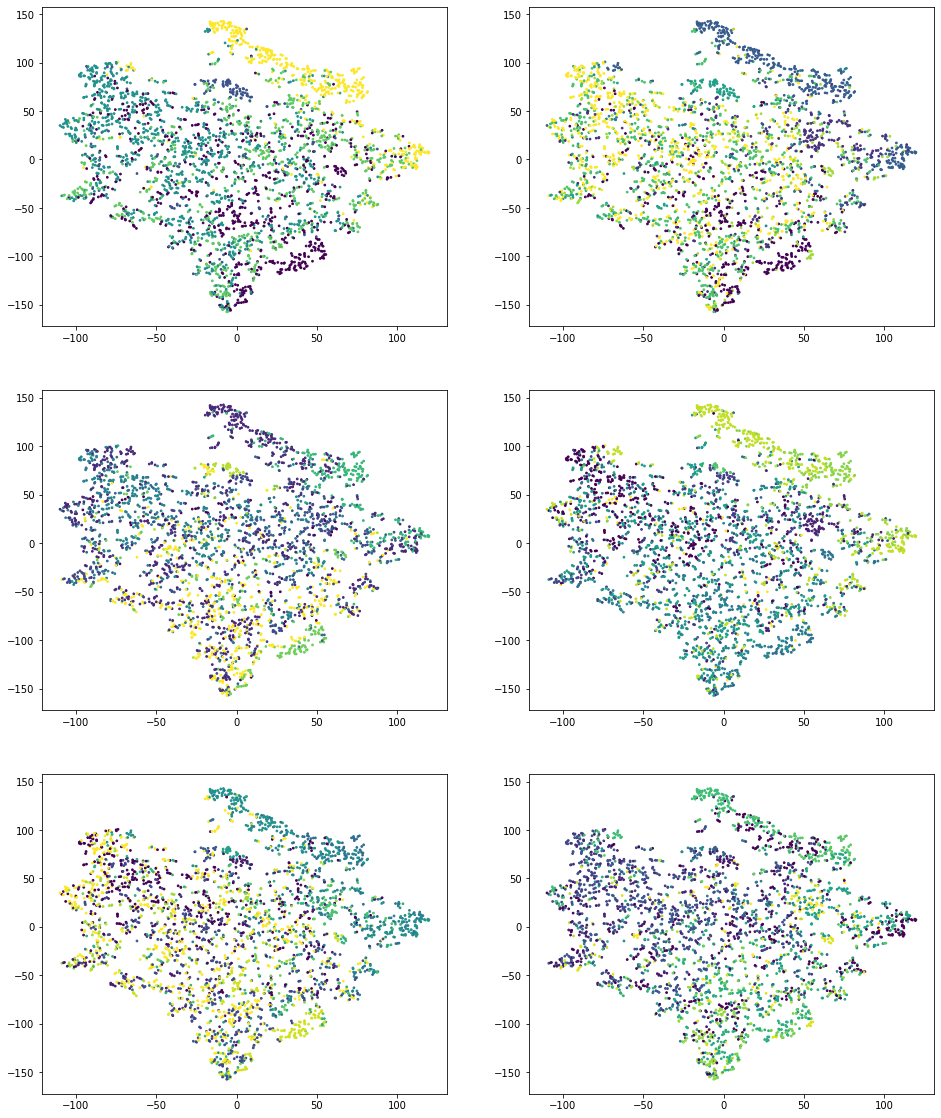

In [227]:
%matplotlib inline
fig = plt.figure(figsize=(16,20))
ax = fig.subplots(3,2)
cluster_iid = 0

for i in range(3):
    for j in range(2):
        ax[i,j].scatter(t_axises[:,0],t_axises[:,1],s=3,c=gmm_label_ls[cluster_iid]);
        cluster_iid += 1

# leukocyte cluster main

## T SNE

In [36]:
from importlib import reload
from src.leukocyte_cluster import statistics_preprocess,t_sne_tuning,data_filtering

read data

In [23]:
csvs = os.listdir(os.path.join(data_path,'leukocyte_ratio'))
csvs = list(filter(lambda x: 'csv' in x,csvs))

DF = {}              # load all the csv in a dict
for csv in csvs:     
    DF[csv.replace('.csv','')] = utils.read_leukocyte(data_path,separate=True,csv=csv)  # 'ALL.csv' is also inside

create statistics

data filtering

In [32]:
data_dict = {}
statistics = {}
for cancer in DF.keys():
    statistics[cancer] = DF[cancer].describe(percentiles=[0.25,0.5,0.75,0.95,0.99]) #  statistics is created for later used
    data_dict[cancer] = data_filtering(DF[cancer],statistics[cancer])

/home/ZwZ/script/HER2_prediction/leukocyte/src/leukocyte_cluster.py:64: RuntimeWarning: invalid value encountered in greater
  row_screen = (np.sum(v_data > threshold1,axis=1) <4) | (np.sum(v_data > threshold2,axis=1) <2)


In [174]:
labels_dict = {}
for cancer in  DF.keys():
    data=data_dict[cancer].fillna(0).iloc[:,1:].values    # take  colon data as example
    data = normalize(data)                      # normailize before cluster

    # agglomerative clustering
    ac_label_ls = [AgglomerativeClustering(n_clusters=i).fit_predict(data) for i in range(5,20)]
    ac_metrics = my_metrics.cluster_metrics(data,ac_label_ls)

    # label of vote
    labels_dict[cancer] = ac_label_ls[ac_metrics.vote()]

t_sne

## columns plot

In [155]:
data_dict['ALL'].shape

(3136, 21)

In [459]:
n_data = DF.iloc[:,1:-1].values

ac_label_ls = [AgglomerativeClustering(n_clusters=i).fit_predict(n_data) for i in range(5,20)]
ac_metrics = my_metrics.cluster_metrics(n_data,ac_label_ls)

label_df=pd.DataFrame({'x':range(n_data.shape[0]),'label': ac_label_ls[0]}).sort_values('label')
index=label_df['x']

n_data = n_data[index]

In [122]:
test_data = n_data[np.random.choice(n_data.shape[0],200)]

In [124]:
N = np.arange(test_data.shape[0])

In [131]:
cmap = cm.cividis

In [446]:
ac_label_num = np.bincount(ac_label_ls[0])

In [476]:
def stack_barplot(data,label_num,cmap=cm.gist_earth_r,**kwarg):
    
    figsize = (45,15) if data.shape[0] > 2000 else (12,5)
    fig = plt.figure(figsize=figsize)
    
    ax = fig.add_axes([0,0,1,1]) 
    N = np.arange(data.shape[0])
    ax.bar(N,height=data[:,0],color=cmap(0/data.shape[1]),**kwarg)
    for i in range(data.shape[1]):
        ax.bar(N,height=data[:,i],bottom=data[:,:i].sum(axis=1),color=cmap(i/data.shape[1]),**kwarg)
        ax.set_xlim(0,data.shape[0])
        ax.axis('off')
    
    ax2 = fig.add_axes([0,1-0.02,1,0.05])   #left,bottom,width,height
    LEFT = 0
    for num in label_num:
        ax2.barh(0,num,left=LEFT)
        ax2.set_xlim(0,data.shape[0]-1)
        ax2.axis('off')
        LEFT += num
    
    ax3 = fig.add_axes([0,1.03,1,0.4]) #left,bottom,width,height
    ax3.axis('off')
    tree = dendrogram(Z,p=15,truncate_mode='level',no_labels=True,above_threshold_color='black',color_threshold=0.1,ax=ax3)

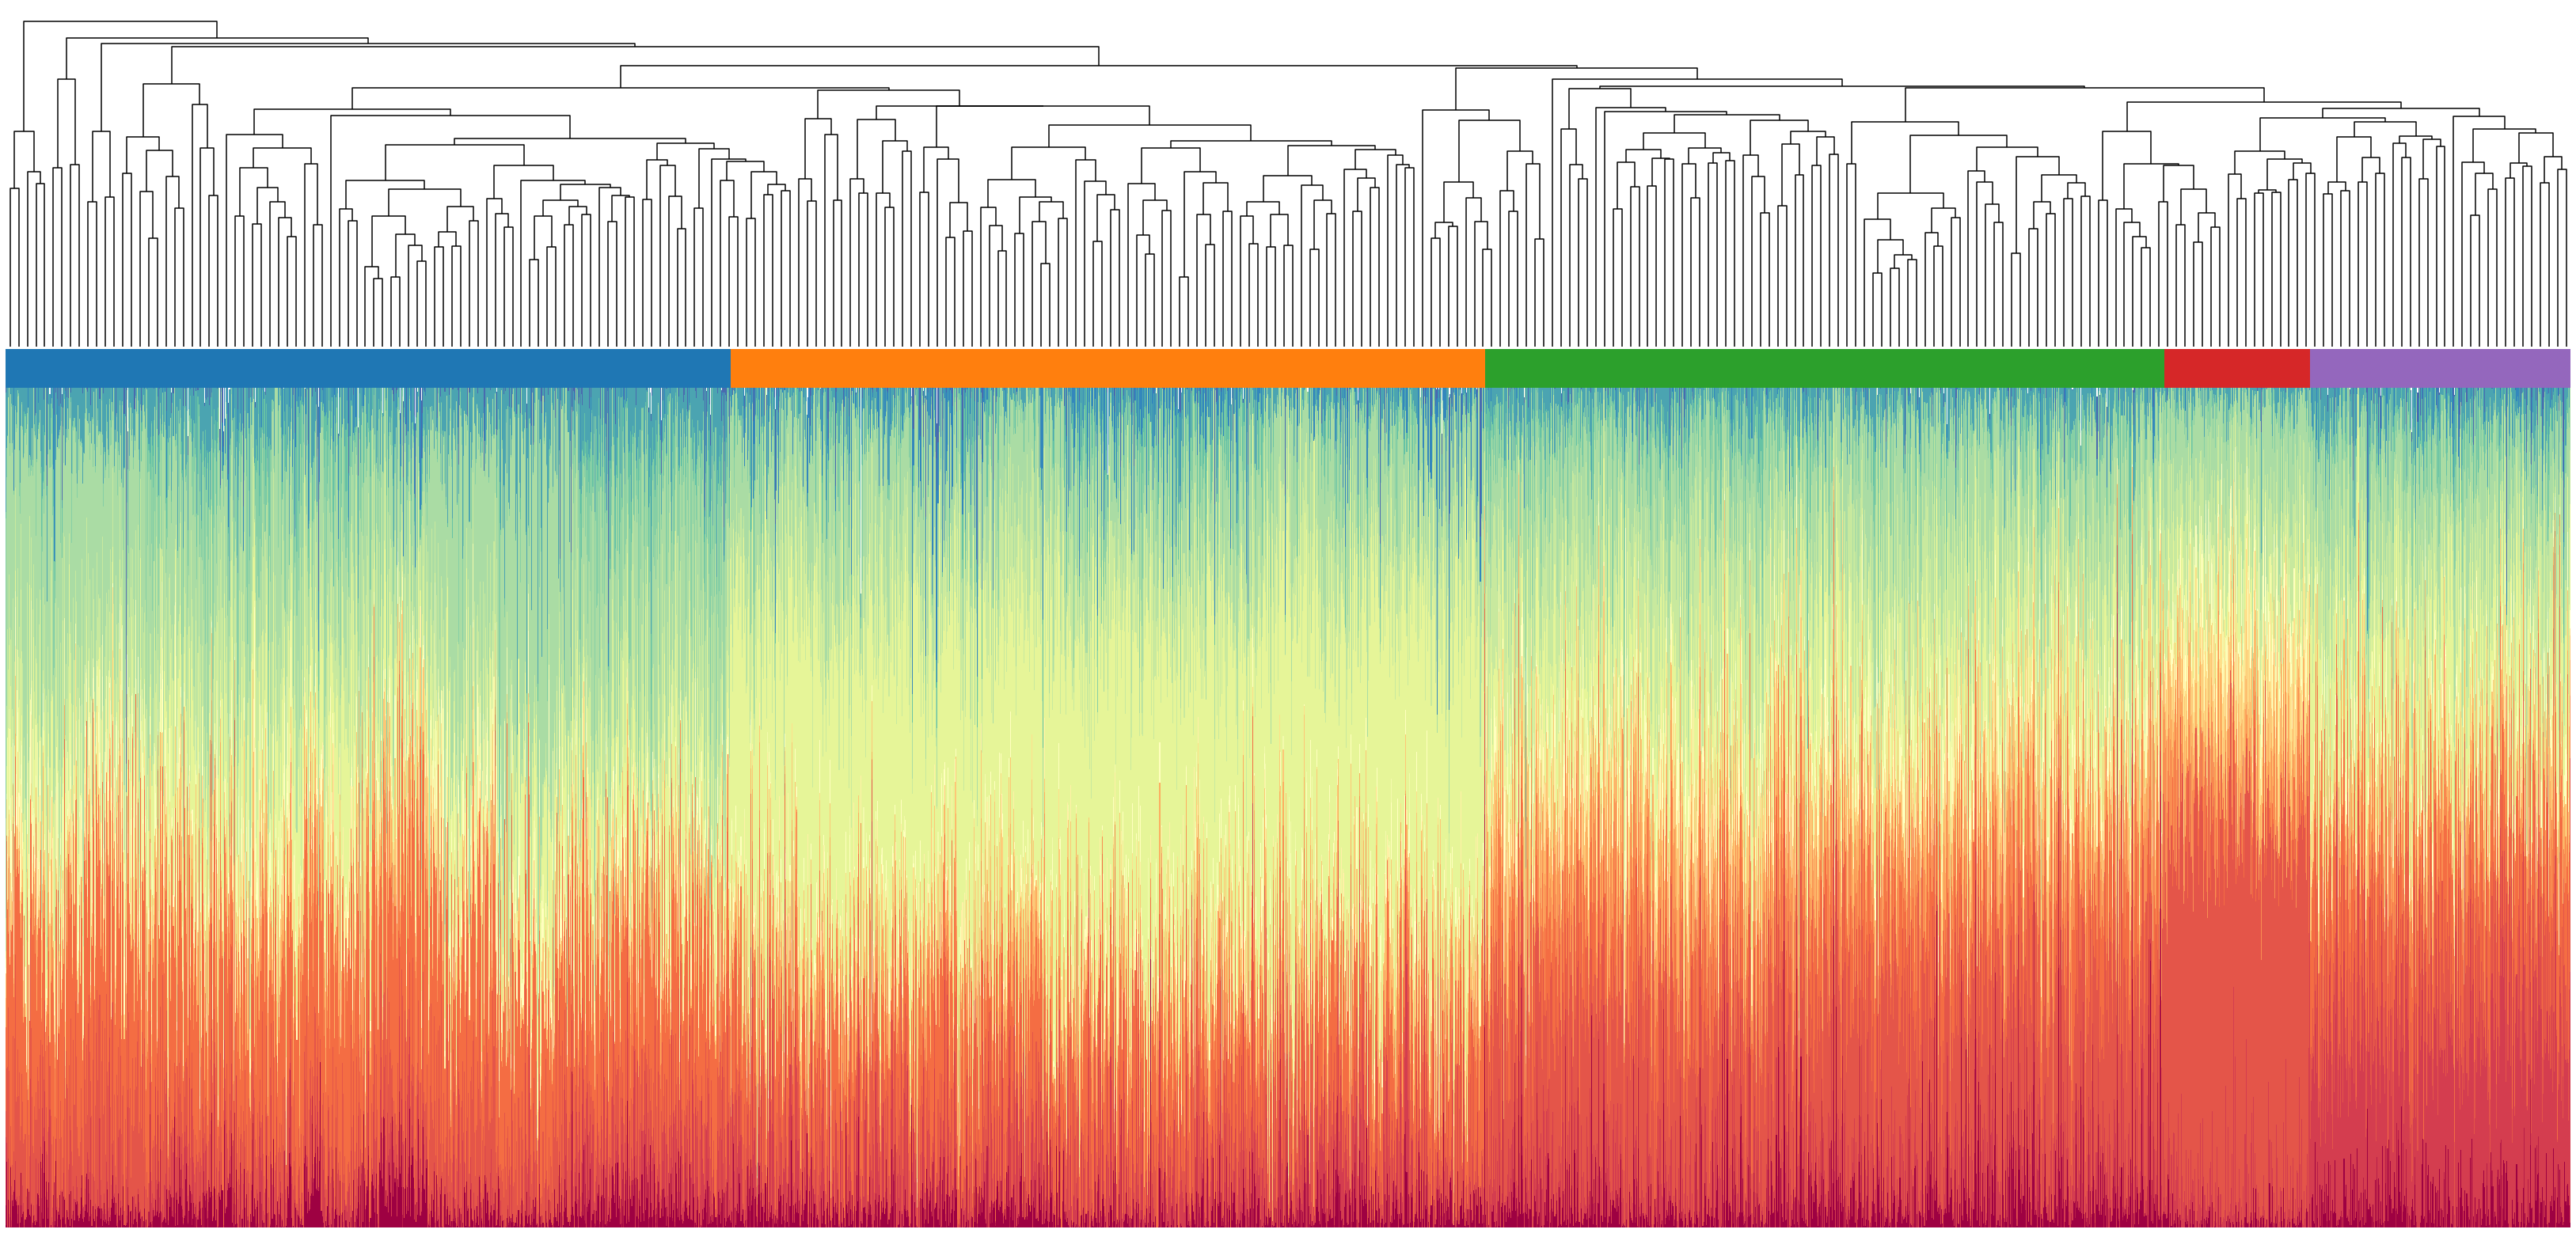

In [477]:
stack_barplot(n_data,ac_label_num,cmap=cm.Spectral,**{'width':1})

## gather heatmap

In [311]:
from sklearn.metrics import pairwise

In [338]:
from sklearn.preprocessing import scale,normalize

In [389]:
# data for HC
disMat=distance.pdist(n_data,metric='euclidean')
Z=linkage(disMat,method='average') 

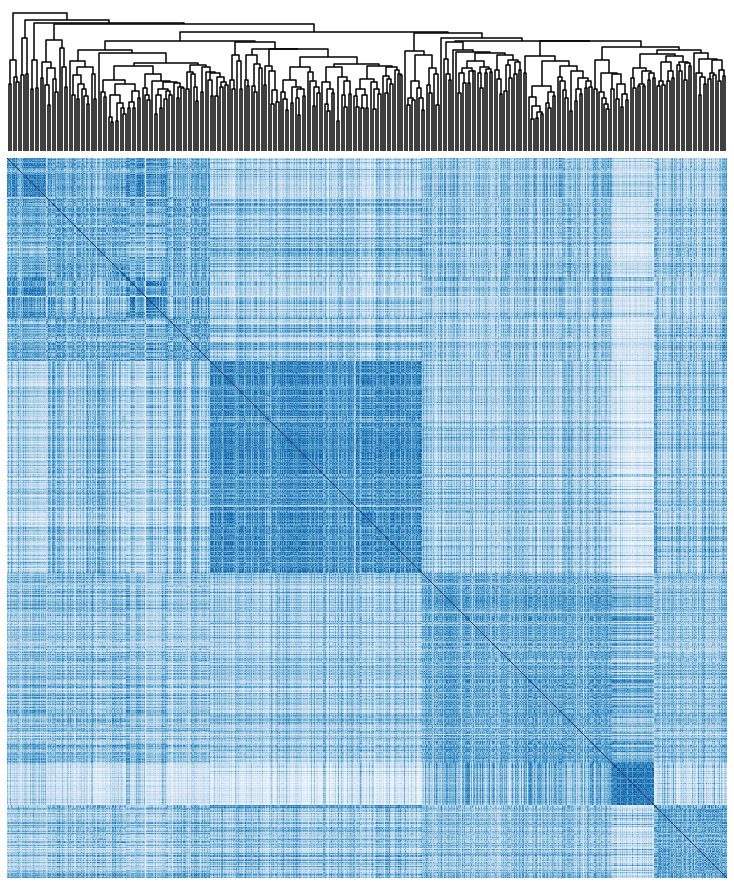

In [481]:
def tree_heatmap(n_data,Z):
    n_data = normalize(n_data)

    # data for heat map
    Dist_M = pairwise.pairwise_distances(n_data)
    Sim_M = np.max(Dist_M) - Dist_M   # make distance Matrix a similarity Matrix


    fig = plt.figure(figsize = (16,10))
    ax = fig.add_axes([0,0,1,1])    #left,bottom,width,height
    ax.axis('off')
    ax.imshow(Sim_M,cmap=cm.Blues);

    ax2 = fig.add_axes([0.188,1.01,0.624,0.2]) #left,bottom,width,height
    ax2.axis('off')
    tree = dendrogram(Z,p=15,truncate_mode='level',no_labels=True,above_threshold_color='black',color_threshold=0.1,ax=ax2)

## cancer type 

get test data

In [180]:
cancer = 'colon'
data_dict[cancer].loc[:,'label'] = label
merge_df = data_dict[cancer][['id','label']].merge(all_tsne_df,left_on=['id'],right_on=['id'],how='inner').sort_values('label')

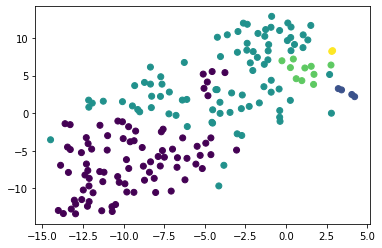

In [184]:
plt.scatter(t_sne['colon'][:,0,],t_sne['colon'][:,1],c=labels_dict['colon'])

In [194]:
local_label = merge_df.label

local_tsne=merge_df.loc[:,['axis0','axis1']].values

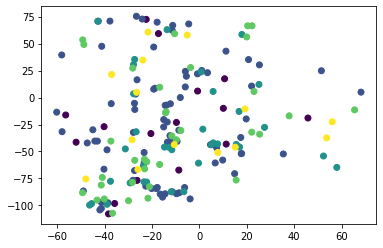

In [195]:
plt.scatter(local_tsne[:,0],local_tsne[:,1],c=local_label)

No handles with labels found to put in legend.


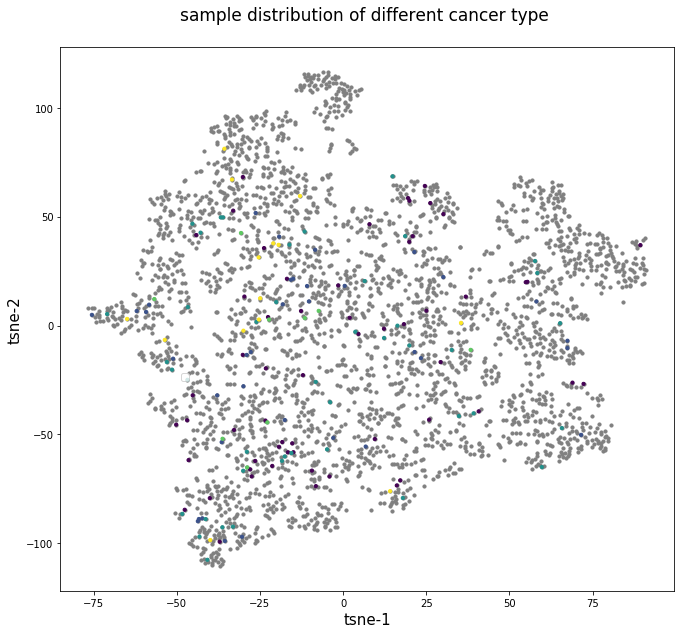

In [179]:
all_tsne_df = pd.read_csv(os.path.join(tsne_path,'ALL_tsne_p30.csv'))
global_tsne = all_tsne_df.iloc[:,1:].values

fig = plt.figure(figsize=(11,10));
ax = fig.gca()
ax.set_xlabel('tsne-1',fontsize=15)
ax.set_ylabel('tsne-2',fontsize=15)
ax.set_title('sample distribution of different cancer type \n',fontsize=17)
ax.scatter(global_tsne[:,0],global_tsne[:,1],s=10,color='gray');


data_dict[cancer].loc[:,'label'] = labels_dict[cancer]
merge_df = data_dict[cancer][['id','label']].merge(all_tsne_df,left_on=['id'],right_on=['id'],how='inner').sort_values('label')
# assert the order of colon DF is the same as merged DF

local_tsne = merge_df.loc[:,['axis0','axis1']].values
local_label = merge_df.label
# plot data
ax.scatter(local_tsne[:,0],local_tsne[:,1],s=10,c=local_label);
fig.legend(bbox_to_anchor=(0.245,0.37));